# 2014 Mental Health in Tech Survey Analysis


Does Remote vs In-person work have an impact on mental and physical health consequences? If so, what are the implications?

In [1]:
#Import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt


In [2]:
# Create a reference to the CSV and import it into a Pandas DataFrame
csv_path = Path("Data/2014_Survey.csv")
survey_df = pd.read_csv(csv_path)
survey_df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [3]:
#Filter DataFrame to view desired data
filtered_survey = ["remote_work", "mental_health_consequence", "phys_health_consequence"]
filtered_survey_df = survey_df[filtered_survey]
filtered_survey_df

,remote_work,mental_health_consequence,phys_health_consequence
0,No,No,No
1,No,Maybe,No
2,No,No,No
3,No,Yes,Yes
4,Yes,No,No
...,...,...,...
1254,No,No,No
1255,Yes,No,No
1256,No,Yes,Yes
1257,Yes,Yes,No


In [4]:
#Check for missing data
filtered_survey_df.count()

remote_work                  1259
mental_health_consequence    1259
phys_health_consequence      1259
dtype: int64

In [5]:
#Sort data
cleaned_survey = filtered_survey_df.sort_values(by="remote_work")
cleaned_survey_df=pd.DataFrame(cleaned_survey)
cleaned_survey_df

,remote_work,mental_health_consequence,phys_health_consequence
0,No,No,No
747,No,Maybe,No
748,No,No,No
749,No,No,No
750,No,No,No
...,...,...,...
863,Yes,Yes,No
264,Yes,Maybe,No
861,Yes,No,No
899,Yes,No,No


In [9]:
participants = len(cleaned_survey_df)
print(participants)

1259


In [10]:
# Separate the DataFrame based on remote_work
remote_yes = cleaned_survey_df[cleaned_survey_df['remote_work'] == 'Yes']
remote_no = cleaned_survey_df[cleaned_survey_df['remote_work'] == 'No']

# Count occurrences for mental_health_consequence and phys_health_consequence
def count_occurrences(cleaned_survey_df):
    return {
        'mental_health_consequence': cleaned_survey_df['mental_health_consequence'].value_counts().to_dict(),
        'phys_health_consequence': cleaned_survey_df['phys_health_consequence'].value_counts().to_dict()
    }

# Get counts for remote_yes and remote_no
remote_yes_counts = count_occurrences(remote_yes)
remote_no_counts = count_occurrences(remote_no)

# Display results
print("Remote Work: Yes")
print(remote_yes_counts)

print("\nRemote Work: No")
print(remote_no_counts)

Remote Work: Yes
{'mental_health_consequence': {'No': 157, 'Maybe': 125, 'Yes': 94}, 'phys_health_consequence': {'No': 270, 'Maybe': 86, 'Yes': 20}}

Remote Work: No
{'mental_health_consequence': {'Maybe': 352, 'No': 333, 'Yes': 198}, 'phys_health_consequence': {'No': 655, 'Maybe': 187, 'Yes': 41}}


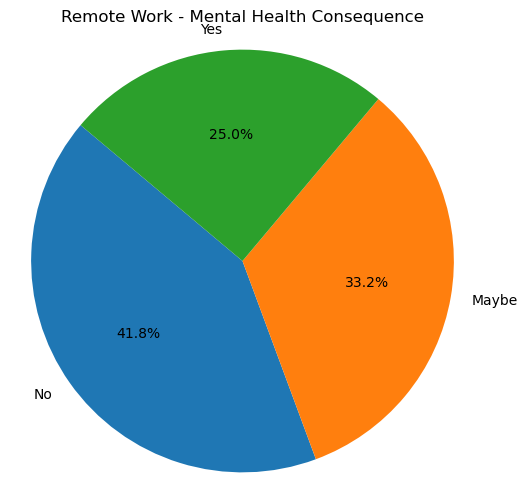

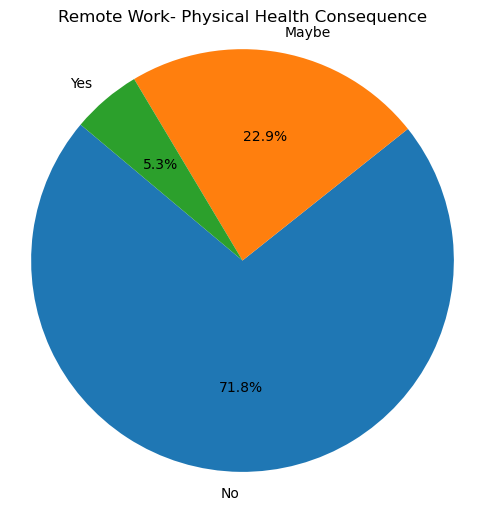

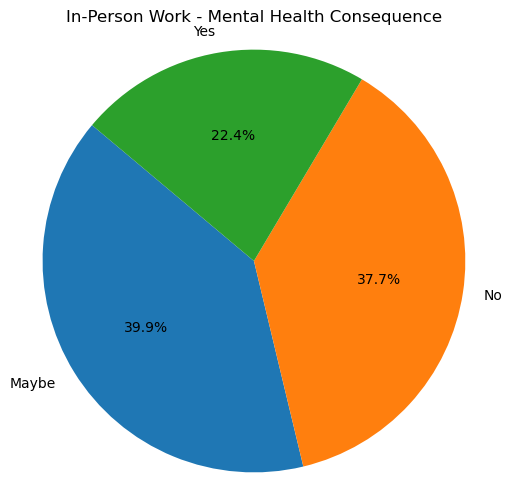

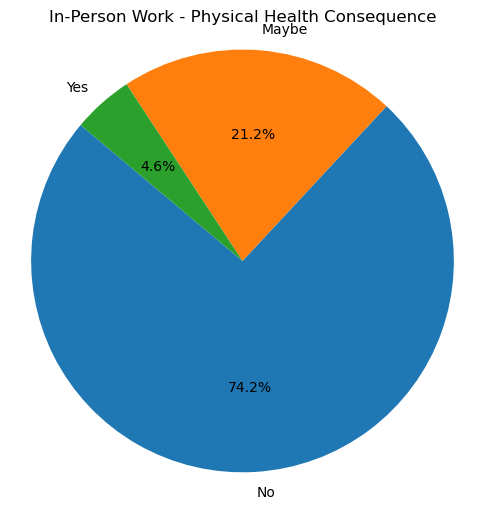

In [11]:
#Create Pie Charts to compare data

# Function to plot pie chart
def plot_pie_chart(data, title):
    labels = list(data.keys())
    sizes = list(data.values())
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Plot pie charts for remote_yes
plot_pie_chart(remote_yes_counts['mental_health_consequence'], 'Remote Work - Mental Health Consequence')
plot_pie_chart(remote_yes_counts['phys_health_consequence'], 'Remote Work- Physical Health Consequence')

# Plot pie charts for remote_no (if there's data)
if not remote_no.empty:
    plot_pie_chart(remote_no_counts['mental_health_consequence'], 'In-Person Work - Mental Health Consequence')
    plot_pie_chart(remote_no_counts['phys_health_consequence'], 'In-Person Work - Physical Health Consequence')
else:
    print("No data for remote work 'No'")

## Analysis

* Mental Health Consequences:

Both remote and in-person work settings have a significant percentage of employees indicating no mental health consequences, with remote work slightly higher at 41.8% compared to 37.7% for in-person.
The "Maybe" category is higher for in-person work (39.9%) compared to remote work (33.2%), suggesting more uncertainty or varied experiences regarding mental health among in-person workers.
The "Yes" responses are relatively close between the two groups, with remote work at 25.0% and in-person work at 22.4%.

* Physical Health Consequences:

A large majority of both remote and in-person workers report no physical health consequences, with in-person work slightly higher at 74.2% compared to 71.8% for remote work.
The "Maybe" responses are fairly similar, with remote work at 22.9% and in-person work at 21.2%.
The "Yes" responses are very low for both groups, with remote work at 5.3% and in-person work at 4.6%.

## Implications

* Mental Health Support:

Organizations should continue to monitor and support mental health for both remote and in-person workers. The slightly higher "No" responses for remote work suggest some advantage, but the substantial "Maybe" and "Yes" responses indicate ongoing challenges.
Tailored mental health programs may be beneficial, particularly for in-person workers who show higher uncertainty (Maybe responses).

* Physical Health Support:

While the majority report no physical health consequences, the significant "Maybe" responses indicate a need for proactive measures to address potential physical health issues, particularly for remote workers who may have less ergonomic work setups.
Providing resources and guidance on maintaining physical health, such as ergonomics training and regular health check-ins, can help mitigate potential issues.

* General Health Initiatives:

Both groups show relatively low "Yes" responses for physical health consequences, which is positive. However, continuous improvement and attention to physical health in both remote and in-person work environments remain crucial.
Promoting a balanced work-life approach and regular breaks can help in reducing both mental and physical health consequences.
By addressing these areas, organizations can foster a healthier and more supportive work environment, regardless of whether employees are working remotely or in-person.

# Next Steps

I would like to research more recent data, specifically surveys during and after COVID to see if the results have changed. 